# Shivank Gupta
# TSF task 5
data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# EDA

In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Univariate Analysis

In [8]:
print(data['Ship Mode'].nunique())
data['Ship Mode'].unique()

4


array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [9]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

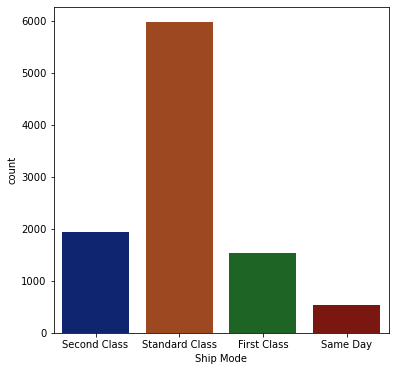

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Ship Mode'],palette='dark')


In [11]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Count of segements')

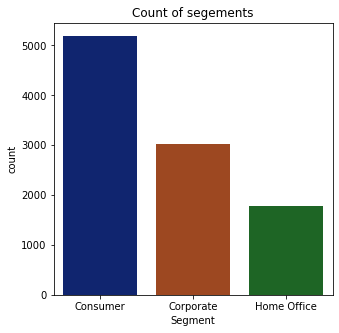

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Segment'],palette='dark')
plt.title('Count of segements')

In [13]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [14]:
city=data["City"].value_counts().head()
city

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: City, dtype: int64

In [15]:
data['City'].nunique()

531

Text(0, 0.5, 'Name of city')

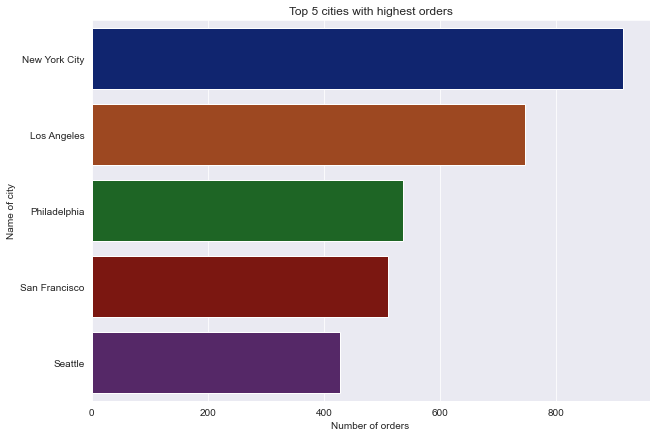

In [16]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.barplot(x=city,y=city.index,palette='dark')
plt.title('Top 5 cities with highest orders')
plt.xlabel('Number of orders')
plt.ylabel('Name of city')

Text(0.5, 1.0, 'Region wise distribution of orders')

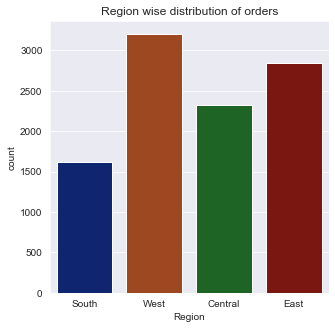

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Region'],palette='dark')
plt.title('Region wise distribution of orders')

In [18]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Text(0.5, 1.0, 'no. of orders in different categories')

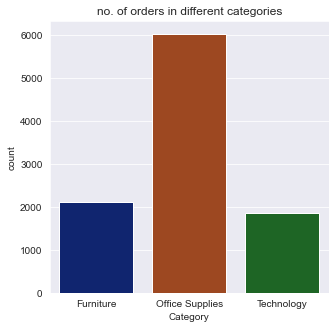

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Category'],palette='dark')
plt.title("no. of orders in different categories")

let's findout subcategories in each category

In [20]:
print("sub categories in furniture")
sub_furn=data[data['Category']=='Furniture']['Sub-Category']
sub_furn.value_counts()

sub categories in furniture


Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [21]:
print("sub categories in Technology")
sub_tech=data[data['Category']=='Technology']['Sub-Category']
sub_tech.value_counts()

sub categories in Technology


Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64

In [22]:
print("sub categories in ofice supplies")
sub_office=data[data['Category']=='Office Supplies']['Sub-Category']
sub_office.value_counts()

sub categories in ofice supplies


Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: Sub-Category, dtype: int64

In [23]:
furni=data[data['Category']=='Furniture']['Category']
office=data[data['Category']=='Office Supplies']['Category']
tech=data[data['Category']=='Technology']['Category']

Text(0.5, 1.0, 'subcategories under furniture')

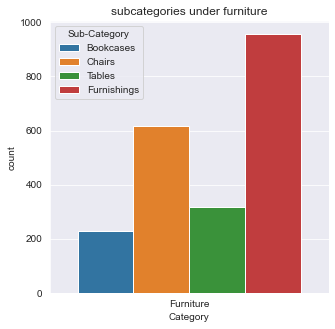

In [24]:
sns.countplot(x=furni,hue=sub_furn)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('subcategories under furniture')

Text(0.5, 1.0, 'subcategories under technology')

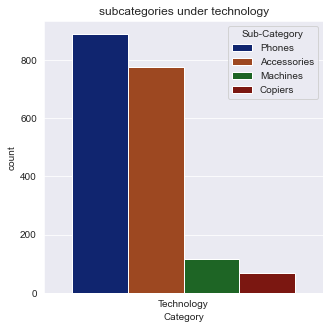

In [25]:
sns.countplot(x=tech,hue=sub_tech,palette='dark')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('subcategories under technology')

Text(0.5, 1.0, 'subcategories under technology')

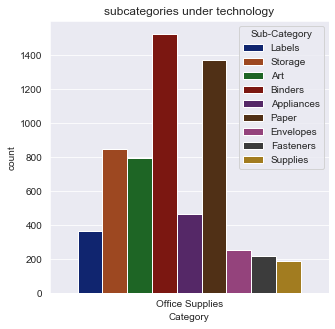

In [26]:
sns.countplot(x=office,hue=sub_office,palette='dark')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('subcategories under technology')

In [27]:
print("max no of units sold at single instance")
data['Quantity'].max()

max no of units sold at single instance


14

In [28]:
print("max discount given at single instance")
data['Discount'].max()

max discount given at single instance


0.8

In [29]:
print("max profit earned at single instance")
data['Profit'].max()

max profit earned at single instance


8399.976

In [30]:
print("max loss faced at single instance")
data['Profit'].min()

max loss faced at single instance


-6599.978

# Bivariate Analysis

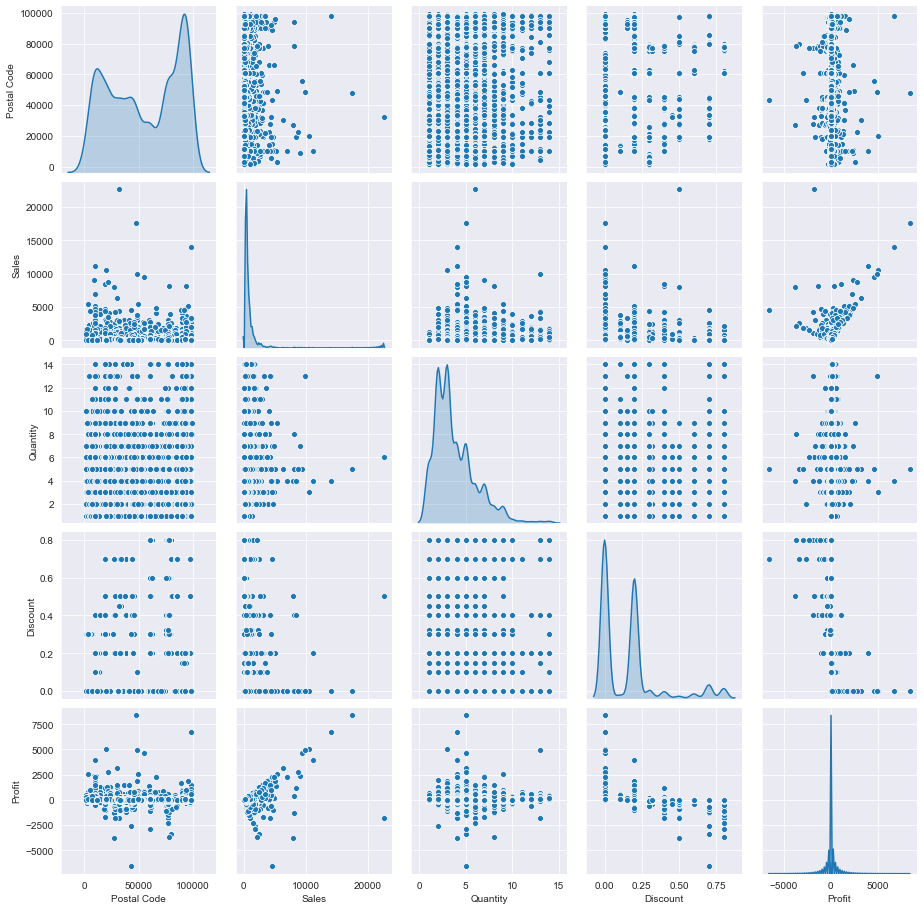

In [31]:
sns.pairplot(data,diag_kind='kde')

<AxesSubplot:>

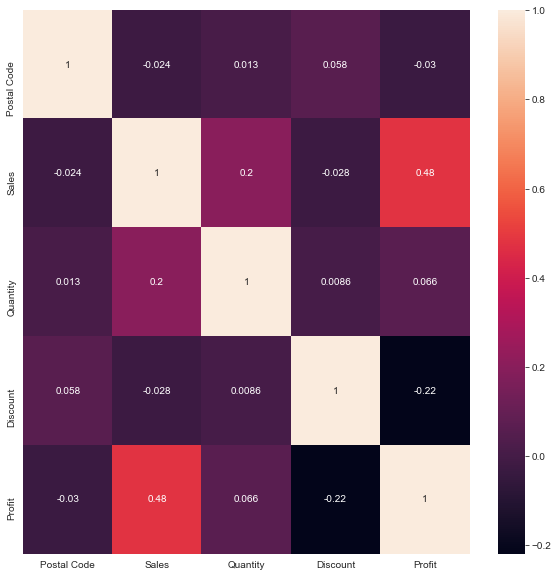

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'segment division in ship mode')

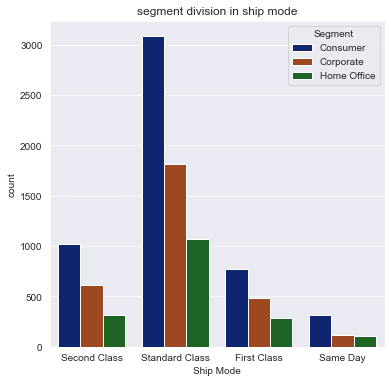

In [33]:
sns.countplot(x=data['Ship Mode'],hue=data['Segment'],palette='dark')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('segment division in ship mode')

In [34]:
seg_data=data.groupby("Segment")['Quantity'].sum().reset_index()
seg_data

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


Text(0.5, 1.0, 'segment wise order distribution')

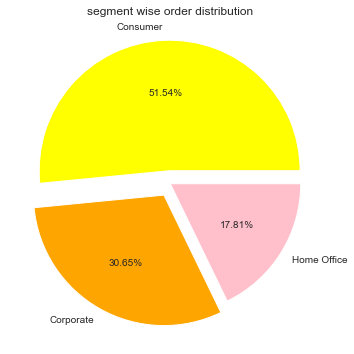

In [35]:
labels=data['Segment'].unique()
colors = ['yellow','orange','pink']
plt.pie(seg_data['Quantity'],autopct='%1.02f%%',explode=(0.1,0.1,0),labels=labels,colors=colors)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('segment wise order distribution')

In [36]:
city_data=data.groupby("City")['Quantity'].sum().reset_index().sort_values(by=['Quantity'],ascending=False).head()
city_data

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590


Text(0.5, 1.0, 'top 5 cities wise order distribution')

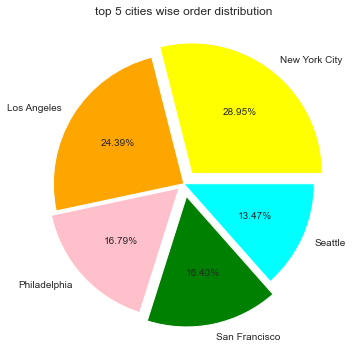

In [37]:
labels=city_data['City'].unique()
colors = ['yellow','orange','pink','green','cyan']
plt.pie(city_data['Quantity'],autopct='%1.02f%%',explode=(0.1,0,0.05,0.1,0),labels=labels,colors=colors)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('top 5 cities wise order distribution')

In [38]:
cat = data.groupby('Category')['Profit'].sum().reset_index()
cat

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'category wise profit distribution')

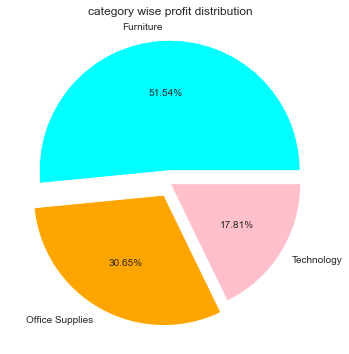

In [39]:
labels=data['Category'].unique()
colors = ['cyan','orange','pink']
plt.pie(seg_data['Quantity'],autopct='%1.02f%%',explode=(0.1,0.1,0),labels=labels,colors=colors)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('category wise profit distribution')

In [40]:
subcat=data.groupby("Sub-Category")['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)
subcat

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


Text(0.5, 16.657875000000004, 'PRODUCTS')

<Figure size 1440x720 with 0 Axes>

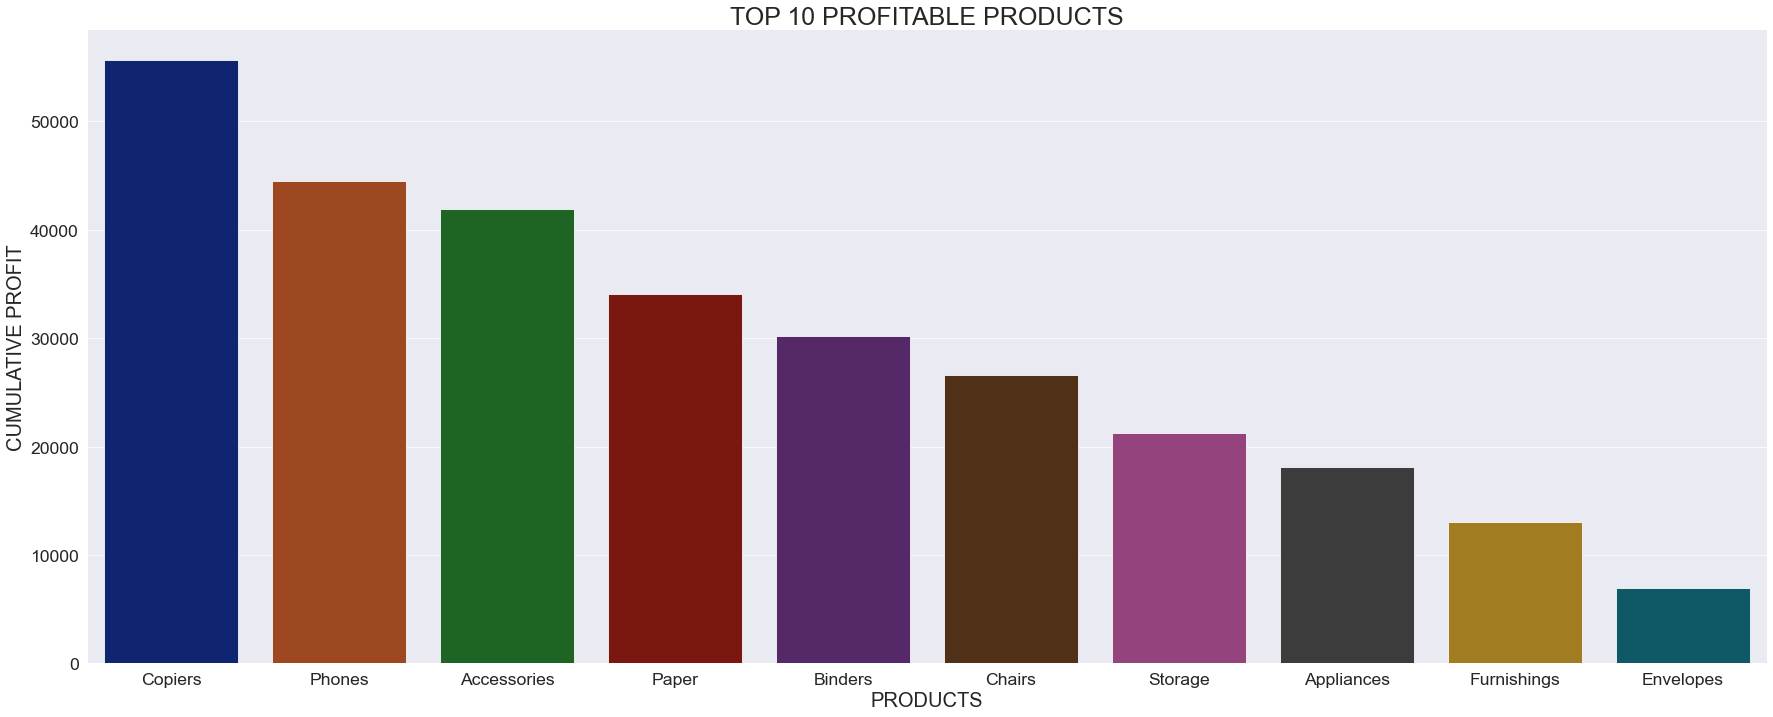

In [42]:
plt.figure(figsize =(20,10))
sns.set_context("paper",font_scale=2)
sns.catplot(x='Sub-Category',y='Profit',data=subcat,kind='bar',aspect=2.5,height=10,palette='dark')
plt.title('TOP 10 PROFITABLE PRODUCTS',size=25)
plt.ylabel('CUMULATIVE PROFIT',size=20)
plt.xlabel('PRODUCTS',size=20)

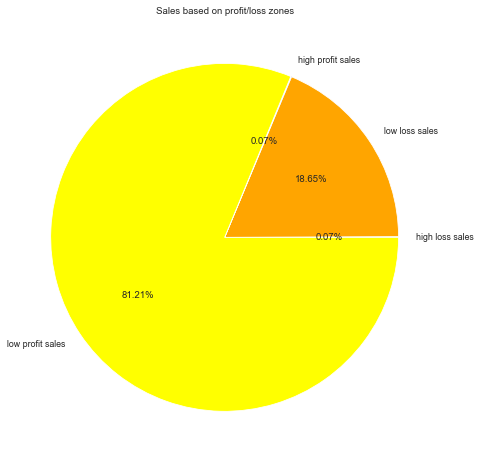

In [50]:
sns.set_context("paper",font_scale=1)
slices=[((data.Profit>=-6600) & (data.Profit<-2000)).sum(),
        ((data.Profit>=-2000) & (data.Profit<0)).sum(),
        ((data.Profit>=3000) & (data.Profit<9000)).sum(),
        ((data.Profit>=0) & (data.Profit<3000)).sum()]
       
labels=['high loss sales','low loss sales','high profit sales','low profit sales']
colors = ['black','orange','blue','yellow']
explode = [0,0,0,0]
plt.pie(slices,colors=colors,labels=labels,autopct='%1.02f%%',explode = explode)
fig = plt.gcf()
plt.title("Sales based on profit/loss zones")

fig.set_size_inches(8,8)
plt.show()